In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from collocation.bvp import OrthogonalCollocation

# Example 1

This is a simple problem yet a "mixed type" problem in which we must estimate both interior points and boundary points

$\frac{d^2 y}{dx^2} + k y + 1 = 0$

$\frac{dy}{dx} - 1 = 0$ at $x = 1$

$\frac{dy}{dx} = 0$ at $x = 0$

In [2]:
#Internal function
def fun_1(x, y, dy, d2y, k):
    
    return d2y[0] + k * y[0] + 1

#Boundary function
def bc_1(x, y, dy, d2y, k):
    
    return dy[0] - 1

k = 1.0

In [3]:
%%time

#Number of collocatioin points
n_points = 6

#Create problem
problem_1 = OrthogonalCollocation(fun_1, bc_1, n_points, 1, x0=0.0, x1=1.0, vectorized=True)

#Initial estimation
y01 = np.zeros([1, n_points + 1])

#Collocation using scipy.optimize.root in backend
problem_1.collocate(y01, args=k, method="hybr", tol=1e-6)

CPU times: total: 0 ns
Wall time: 26.9 ms


In [4]:
#Internal function in scipy framework
def fun_scipy1(x, y):
    return np.vstack((y[1], -k * y[0] - 1))

#Boundary function
def bc_scipy1(ya, yb):
    return np.array([ya[1], yb[1] - 1])

#Initial estimation independent points
x1 = np.linspace(0, 1, 7)

#Initial estimation
y01 = np.zeros((2, x1.size))

In [5]:
%%time

#scipy solution
res_scipy1 = solve_bvp(fun_scipy1, bc_scipy1, x1, y01)

CPU times: total: 141 ms
Wall time: 265 ms


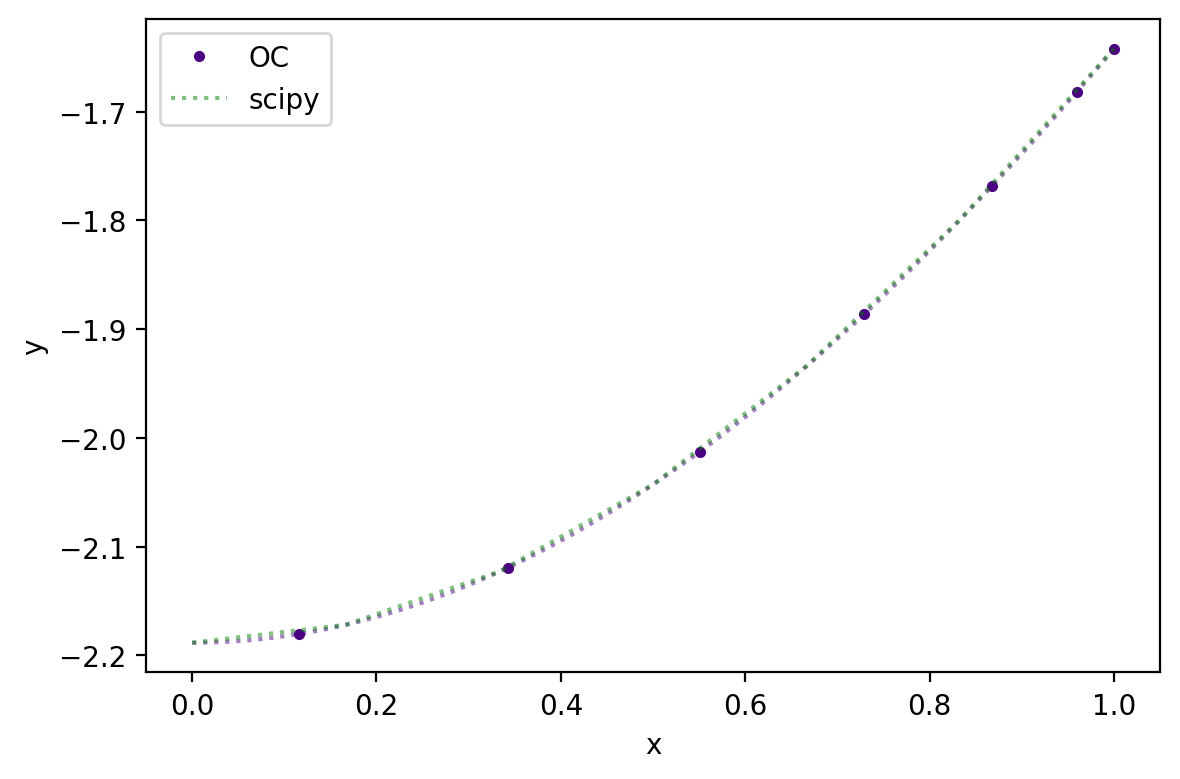

In [6]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=200)

x = np.linspace(0, 1, 50)
ax.plot(x, problem_1.interpolate(x)[0], color="indigo", alpha=0.5, linestyle=":")
ax.plot(problem_1.x, problem_1.y[0], color="indigo", marker=".", label="OC", linestyle=" ")
ax.plot(res_scipy1.x, res_scipy1.y[0], color="green", alpha=0.5, linestyle=":", label="scipy")

ax.set_ylabel("y")
ax.set_xlabel("x")

ax.legend()
fig.tight_layout()
plt.show()

# Example 2: System of equations

$\frac{d^2 y_1}{dx^2} + k_1 y_2 + 1 = 0$

$\frac{d^2 y_2}{dx^2} + k_2 log(1 + y_1) = 0$

$y_1 = 0$ at $x = 1$

$y_2 - 1 = 0$ at $x = 1$

$\frac{dy_1}{dx} = 0$ at $x = 0$

$\frac{dy_2}{dx} = 0$ at $x = 0$

In [7]:
#Internal function
def fun_2(x, y, dy, d2y, k1, k2):
    
    return np.array([d2y[0] + k1 * y[1] + 1, d2y[1] + k2 * np.log(1 + y[0])])

#Boundary function
def bc_2(x, y, dy, d2y, k1, k2):
    
    return np.array([y[0], y[1] - 1])

k1 = 1.0
k2 = -1.0

In [8]:
%%time

#Number of collocatioin points
n_points = 6

#Create problem
problem_2 = OrthogonalCollocation(fun_2, bc_2, n_points, 1, x0=0.0, x1=1.0, vectorized=True)

#Initial estimation
y02 = np.zeros([2, n_points + 1])

#Collocation using scipy.optimize.root in backend
problem_2.collocate(y02, args=(k1, k2), method="hybr", tol=1e-6)

CPU times: total: 31.2 ms
Wall time: 4 ms


In [9]:
#Internal function in scipy framework
def fun_scipy2(x, y):
    return np.vstack((y[2], y[3], -k1 * y[1] - 1, -k2 * np.log(1 + y[0])))

#Boundary function
def bc_scipy2(ya, yb):
    return np.array([yb[0], yb[1] - 1, ya[-2], ya[-1]])

#Initial estimation independent points
x2 = np.linspace(0, 1, 7)

#Initial estimation
y02 = np.zeros((4, x2.size))

In [10]:
%%time

#scipy solution
res_scipy2 = solve_bvp(fun_scipy2, bc_scipy2, x2, y02)

CPU times: total: 0 ns
Wall time: 4.99 ms


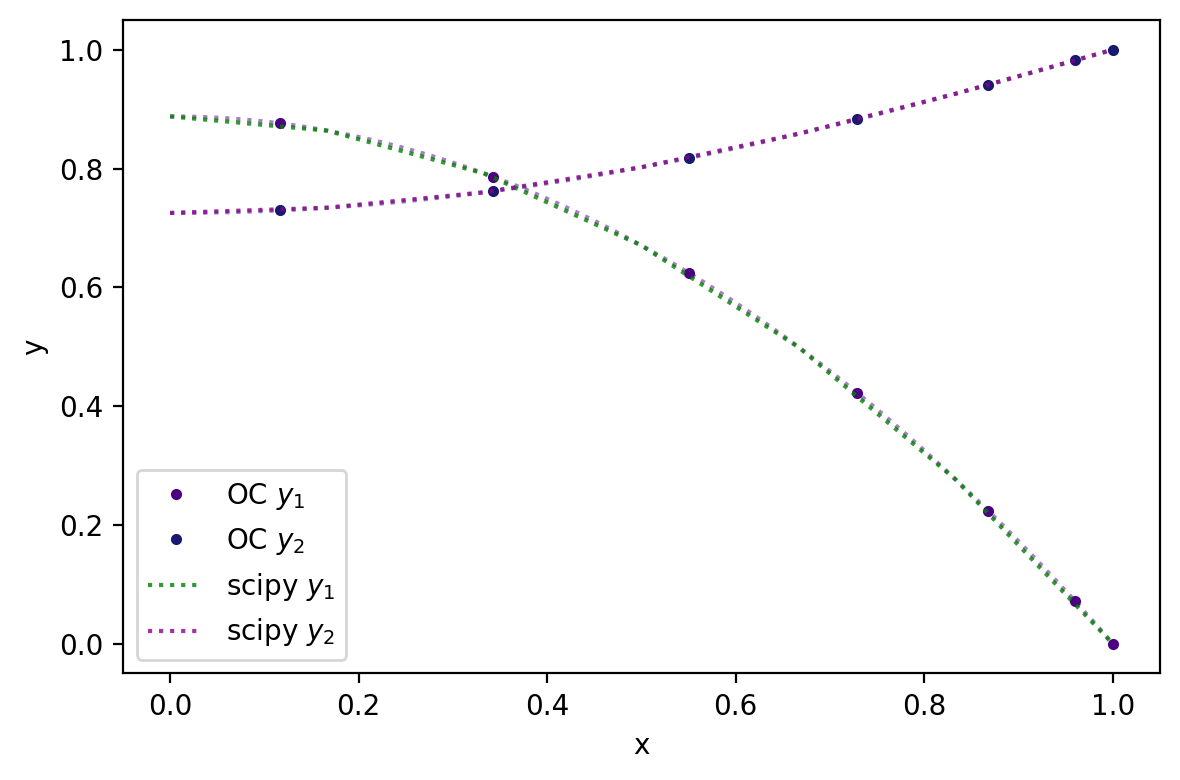

In [11]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=200)

x = np.linspace(0, 1, 50)
ax.plot(x, problem_2.interpolate(x)[0], color="indigo", alpha=0.5, linestyle=":")
ax.plot(problem_2.x, problem_2.y[0], color="indigo", marker=".", label="OC $y_1$", linestyle=" ")
ax.plot(x, problem_2.interpolate(x)[1], color="midnightblue", alpha=0.5, linestyle=":")
ax.plot(problem_2.x, problem_2.y[1], color="midnightblue", marker=".", label="OC $y_2$", linestyle=" ")
ax.plot(res_scipy2.x, res_scipy2.y[0], color="green", alpha=0.8, linestyle=":", label="scipy $y_1$")
ax.plot(res_scipy2.x, res_scipy2.y[1], color="darkmagenta", alpha=0.8, linestyle=":", label="scipy $y_2$")

ax.set_ylabel("y")
ax.set_xlabel("x")

ax.legend()
fig.tight_layout()
plt.show()

# Example 3: Styrene Reactor

This is an interior collocation problem in which we know the y values at boundaries. It was based on the reactor simulations developed by Leite et al. [1] using the kinetic model proposed by Lee [2] and Lee & Froment [3].

[1] B. Leite, A. O. S. Costa and E. F. Costa Junior, "Simulation and optimization of axial-flow and radial-flow reactors for dehydrogenation of ethylbenzene into styrene based on a heterogeneous kinetic model," Chem. Eng. Sci., vol. 244, p. 116805, 2021.

[2] W. J. Lee, "Ethylbenzene Dehydrogenation into Styrene: Kinetic Modeling and Reactor Simulation," Texas A&M University, College Station, Texas, 2005.

[3] W. J. Lee and G. F. Froment, "Ethylbenzene Dehydrogenation into Styrene: Kinetic Modeling and Reactor Simulation," Ind. Eng. Chem. Res., vol. 47, no. 23, pp. 9183-9194, 2008.

$\frac{1}{r^2}(\frac{d}{dr} r^2(\frac{dP_{s,j}}{dr}))=-\frac{R_g T}{D_{e,j}}  r_j$ for components $j$ (Ethylbenzene, Styrene, Hydrogen)

$\frac{dP_{s,j}}{dr} = 0$ at $r = 0$

$P_{s,j} = P_{external,j}$ at pelet surface 

The code is large, so I've hidden it, but those who are interested in details can check them in the cell below.

In [12]:
#Ea is in [kJ/mol.K], T in [K]
#Basic kinetic constant from Arrhenius
def fun_kin(A, Ea, T, R=8.314):
    return A * np.exp(-Ea*1e3 / (R * T))

#Equilibrium constant different from the original article, obtained in [4]
b1, b2, b3, b4, b5, b6 = -17.34, -1.302e4, 5.051, -2.314e-10, 1.301e-6, 4.931e-3
def Kp1(T):
    return np.exp(b1 + (b2/T) + b3*np.log(T) + (T *(b4*T + b5) + b6)*T)

#Component labels to use in arrays
eb, st, h2, bz, me, to, ee, h2o = np.arange(8)

#Thermal reactions:
#p in [bar], T in [K], result in [kmol/m**3.h]
def rt1(p, T):
    Keq = Kp1(T)
    return fun_kin(2.2215e16, 272.23, T) * (p[eb] - (p[st] * p[h2]) / Keq)

def rt2(p, T):
    return fun_kin(2.4217e20, 352.79, T) * p[eb]

def rt3(p, T):
    return fun_kin(3.8224e17, 313.06, T) * p[eb]

def rt4(p, T):
    return 0

#On adsorption:
#T in [K], results in [bar**-1]
def fKad(T):
    return np.array([fun_kin(1.014e-5, -102.22, T),
                     fun_kin(2.678e-5, -104.56, T),
                     fun_kin(4.519e-7, -117.95, T)])

#Dimensionless
def fnum_ad(p, Kad):
    return (1 + Kad[eb]*p[eb] + Kad[h2]*p[h2] + Kad[st]*p[st])**2

#Catalyst reactions:
#p in [bar], T in [K], result in [kmol/kg-cat.h]
def rc1(p, T):
    Keq = Kp1(T)
    Kad = fKad(T)
    k1 = fun_kin(4.594e9, 175.38, T)
    num = fnum_ad(p, Kad)
    return k1 * Kad[eb] * (p[eb] - (p[st] * p[h2] / Keq)) / num

def rc2(p, T):
    Kad = fKad(T)
    k2 = fun_kin(1.060e15, 296.29, T)
    num = fnum_ad(p, Kad)
    return k2 * Kad[eb]*p[eb] / num

def rc3(p, T):
    Kad = fKad(T)
    k3 = fun_kin(1.246e26, 474.76, T)
    num = num = fnum_ad(p, Kad)
    return k3 * Kad[eb]*p[eb] * Kad[h2]*p[h2] / num

def rc4(p, T):
    Kad = fKad(T)
    k4 = fun_kin(8.024e10, 213.78, T)
    num = num = fnum_ad(p, Kad)
    return k4 * Kad[st]*p[st] * Kad[h2]*p[h2] / num

#Transport equations system:
def ft_reactants(r, p, T, D, rhos, es, R=8.314e-2):
    """Second order derivatives in radial coordinates for components partial pressures.

    Args:
        r (float): Pellet radius in [m].
        p (array like of float): Partial pressure of components in [bar].
        T (float): Temperature in [K].
        D (array like of float): Diffusion coefficients of species in [m^2/h].
        rhos (float): Pellet solid density in [kg/m^3].
        es (float): Pellet void fraction.
        R (float, optional): Gases coefficients corresponding units. Defaults to 8.314e-2.

    Returns:
        array like of float: Second order derivatives of partial pressures.
    """

    pre = -(R * T) / D[:3]
    rr1 = es*rt1(p, T) + rhos*rc1(p, T)
    rr2 = es*rt2(p, T) + rhos*rc2(p, T)
    rr3 = es*rt3(p, T) + rhos*rc3(p, T)
    rr4 = es*rt4(p, T) + rhos*rc4(p, T)
    
    fteb_ = -rr1 - rr2 - rr3
    ftst_ = rr1 - rr4
    fth2_ = rr1 - 2*rr4

    return np.array([fteb_, ftst_, fth2_]) * pre.reshape([3, -1])

#To compute effectiveness factors
def effective_reactions(r, p, T, rhos, es):
    
    rr1 = es*rt1(p, T) + rhos*rc1(p, T)
    rr2 = es*rt2(p, T) + rhos*rc2(p, T)
    rr3 = es*rt3(p, T) + rhos*rc3(p, T)
    rr4 = es*rt4(p, T) + rhos*rc4(p, T)
    
    return np.array([rr1, rr2, rr3, rr4])

Notice the equilibrium constant adopted was obtaine from [4] instead of [1, 2, 3] to make the implementation easier on this example notebook.

[4] H. S. Fogler, Elements Of Chemical Reaction Engineering, 3rd ed., Upper Saddle River, N.J.: Prentice Hall PTR, 1999. 

In [13]:
#Molar flow rates [kmol/h]
F = np.array([500, 180, 160, 30, 30, 30, 30, 7777])

#Pressure [bar]
P = 1.0

#Molar fraction y dimensionless
molar_frac = F / F.sum()

#Partial pressure [bar]
p = molar_frac * P

#Temperature [K]
T = 870

#Diffusion coefficients [m**2/h]
Dme = np.array([0.02410133, 0.02127506, 0.18936094])

#Solid density of pellet [kg/m**3]
rhos = 2500

#Void fraction dimensionless
es = 0.4

#Pellet radius [m]
rad = 0.0055/2

In [14]:
#Internal function
def fun_styrene(x, y, dy, d2y, *args, **kwargs):
    
    return d2y - ft_reactants(x, y, *args)

#Boundary function
def bc_styrene(x, y, dy, d2y, *args, **kwargs):
    
    return y - p[:3]

## Impact of choice of collocation points

In [15]:
%%time

n_points = [1, 2, 3, 6, 9]
colors = ["saddlebrown", "maroon", "slateblue", "indigo", "midnightblue"]
problems = []
y_full = []
x_styrene = np.linspace(0, rad, 50)

#Iterate over different number of collocation points to detect differences
for n in n_points:
    
    #Initial guesses repeat composition at boundaries
    initial_guess = np.column_stack((p[:3],) * (n + 1))
    
    #Create problem (3 = sphere geometry of catalyst)
    problem_ = OrthogonalCollocation(fun_styrene, bc_styrene, n, 3, 0, rad, vectorized=True)
    
    #Solve collocation problem
    problem_.collocate(initial_guess, method="hybr", args=(T, Dme, rhos, es), tol=1e-8)
    
    #Copy an extrapolation of polynomials to plot
    y_full_ = problem_.interpolate(x_styrene)
    
    #Append results to list
    problems.append(problem_)
    y_full.append(y_full_)

CPU times: total: 62.5 ms
Wall time: 46.9 ms


Ethylbenzene

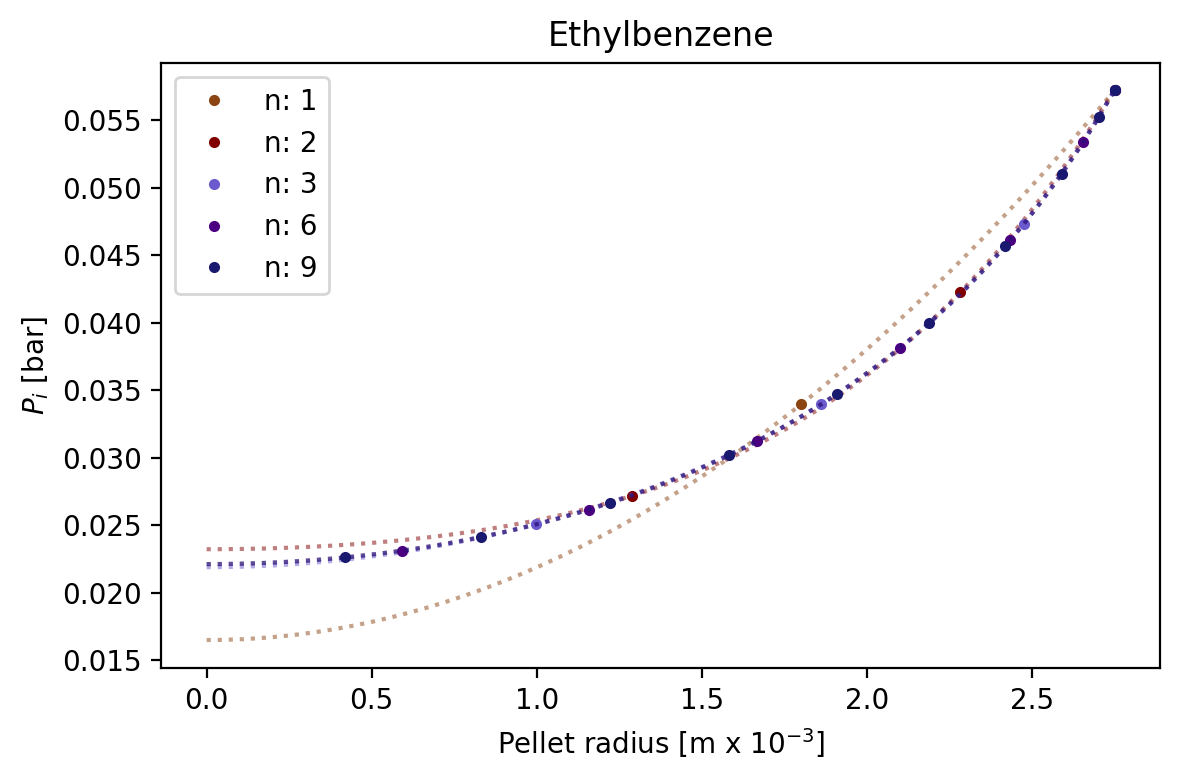

In [16]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=200)

for j, n in enumerate(n_points):
    
    ax.plot(x_styrene * 1000, y_full[j][0], color=colors[j], alpha=0.5, linestyle=":")
    ax.plot(problems[j].x * 1000, problems[j].y[0], color=colors[j], marker=".", label=f"n: {n}", linestyle=" ")

ax.set_ylabel("$P_i$ [bar]")
ax.set_xlabel("Pellet radius [m x $10^{-3}$]")

ax.set_title("Ethylbenzene")

ax.legend()
fig.tight_layout()
plt.show()

Styrene

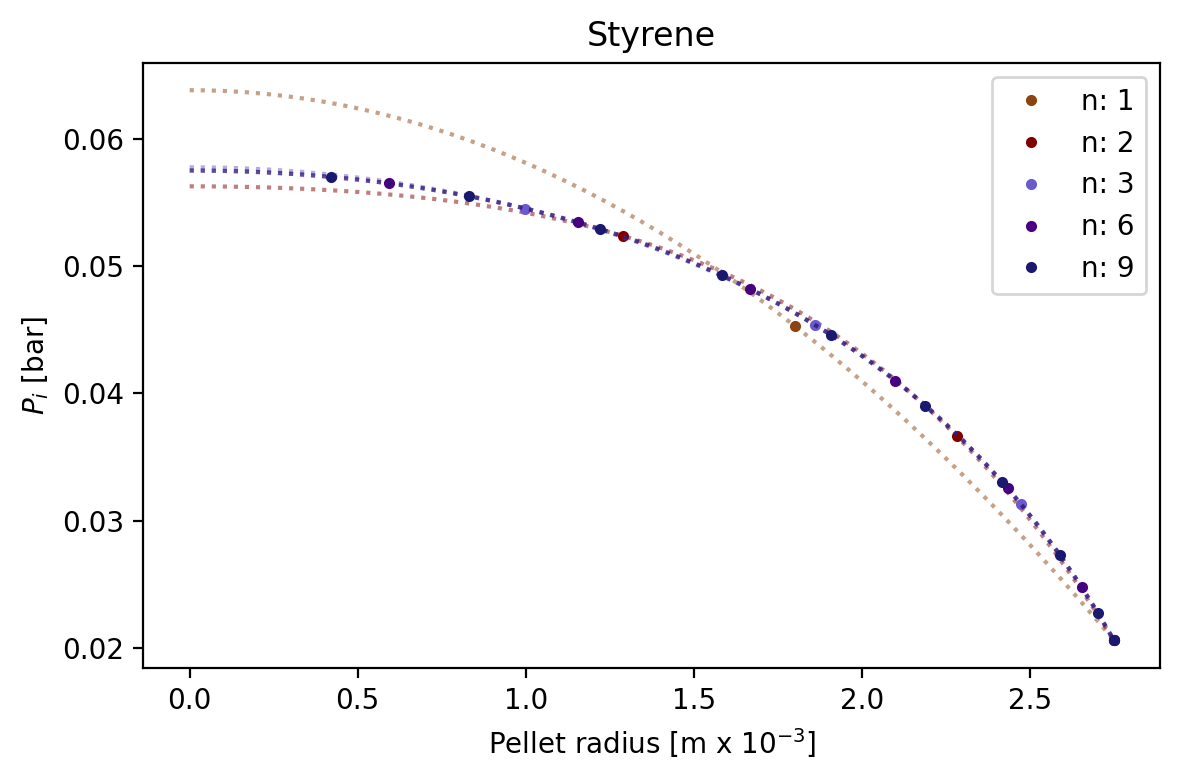

In [17]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=200)

for j, n in enumerate(n_points):
    
    ax.plot(x_styrene * 1000, y_full[j][1], color=colors[j], alpha=0.5, linestyle=":")
    ax.plot(problems[j].x * 1000, problems[j].y[1], color=colors[j], marker=".", label=f"n: {n}", linestyle=" ")

ax.set_ylabel("$P_i$ [bar]")
ax.set_xlabel("Pellet radius [m x $10^{-3}$]")

ax.set_title("Styrene")

ax.legend()
fig.tight_layout()
plt.show()

Effectiveness factors: The core of the problem - We must know the proportion of reaction that occurs inside the catalyst pelets compared to the reaction in the surface.

In [18]:
eff = problems[-1].effectiveness(effective_reactions, args=(T, rhos, es))

for j, n in enumerate(eff):
    print(f"Reaction {j + 1}: {eff[j]:.3f}")

Reaction 1: 0.496
Reaction 2: 0.498
Reaction 3: 0.539
Reaction 4: 1.337


In [19]:
#Internal function for styrene problem scipy like
def fun_styrene_scipy(x, y):
    
    #we must add this new term due spherical vs cartesian geometry
    dy_term = 2 / x * y[:3]
    dy_term[dy_term == np.nan] = 0.0
    
    return np.vstack((ft_reactants(x, y[3:], *(T, Dme, rhos, es)) - dy_term, y[:3]))

#Boundary function for styrene problem scipy like
def bc_styrene_scipy(ya, yb):
    
    return np.append(ya[:3], yb[3:] - p[:3])

In [20]:
#Number of points in initial mesh
n_points = 5

#Guesses for first order derivatives are zeros
dp_guess = np.zeros([3, n_points])

#Guesses for partial pressures are same values as borders
p_guess = np.column_stack((p[:3],) * n_points)

#Combine both
y0_st = np.vstack([dp_guess, p_guess])

#Initial mesh scipy (we must avoid r=0 as it is undefined)
x0_st = np.linspace(1e-8, 0.0055/2, n_points)

## Comparison to benchmark: scipy

In [21]:
%%time
sol_scipy_styrene = solve_bvp(fun_styrene_scipy, bc_styrene_scipy, x0_st, y0_st, tol=1e-6)

CPU times: total: 203 ms
Wall time: 261 ms


Ethylbenzene

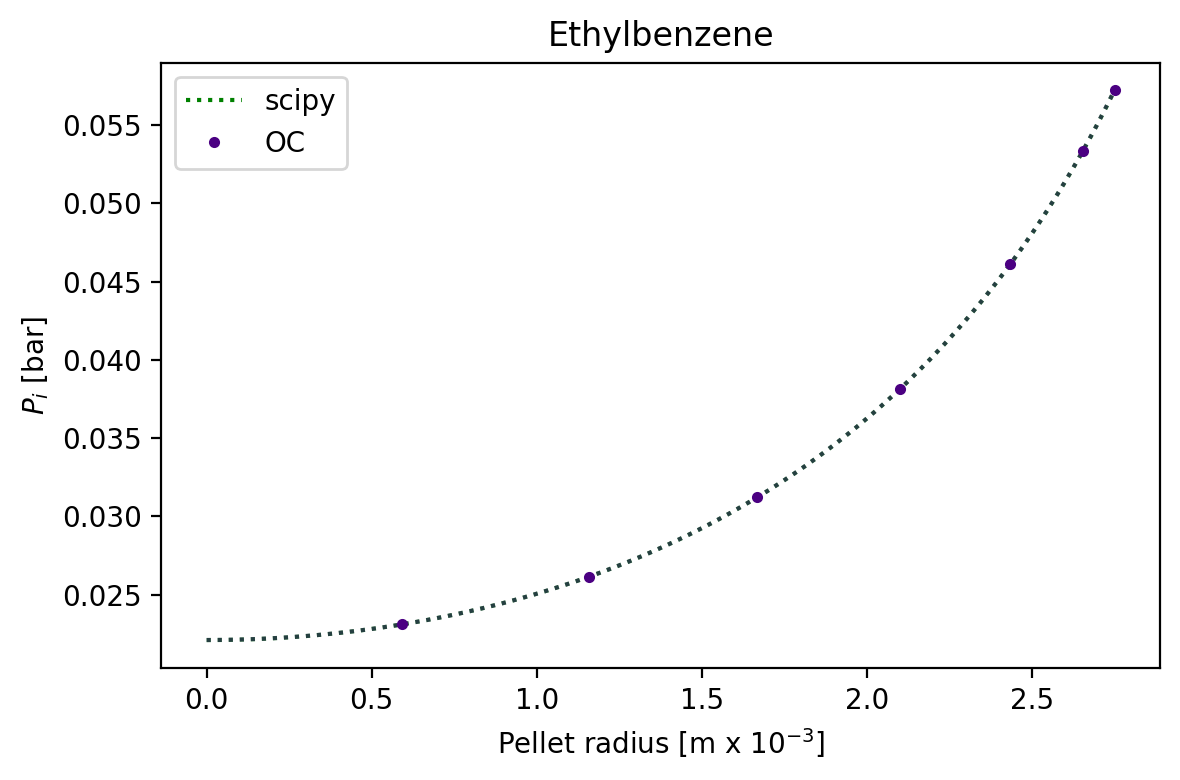

In [22]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=200)

ax.plot(sol_scipy_styrene.x * 1000, sol_scipy_styrene.y[3, :], label="scipy", color="green", linestyle=":")
ax.plot(x_styrene * 1000, y_full[-2][0], color="indigo", alpha=0.5, linestyle=":")
ax.plot(problems[-2].x * 1000, problems[-2].y[0], color="indigo", marker=".", label=f"OC", linestyle=" ")

ax.set_ylabel("$P_i$ [bar]")
ax.set_xlabel("Pellet radius [m x $10^{-3}$]")

ax.set_title("Ethylbenzene")

ax.legend()
fig.tight_layout()
plt.show()

Styrene

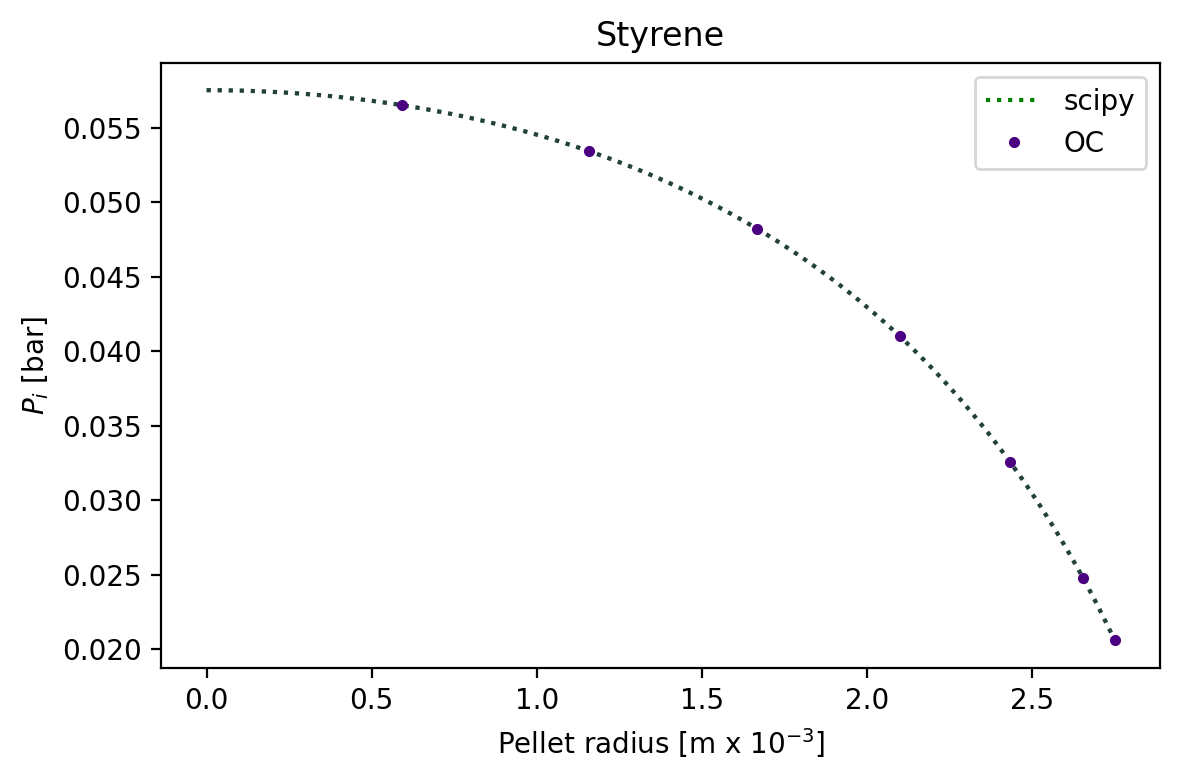

In [23]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=200)

ax.plot(sol_scipy_styrene.x * 1000, sol_scipy_styrene.y[4, :], label="scipy", color="green", linestyle=":")
ax.plot(x_styrene * 1000, y_full[-2][1], color="indigo", alpha=0.5, linestyle=":")
ax.plot(problems[-2].x * 1000, problems[-2].y[1], color="indigo", marker=".", label=f"OC", linestyle=" ")

ax.set_ylabel("$P_i$ [bar]")
ax.set_xlabel("Pellet radius [m x $10^{-3}$]")

ax.set_title("Styrene")

ax.legend()
fig.tight_layout()
plt.show()

Performing estimations for 5 different numbers of collocation points was more than 4x faster than scipy.